## 데이터셋 설명
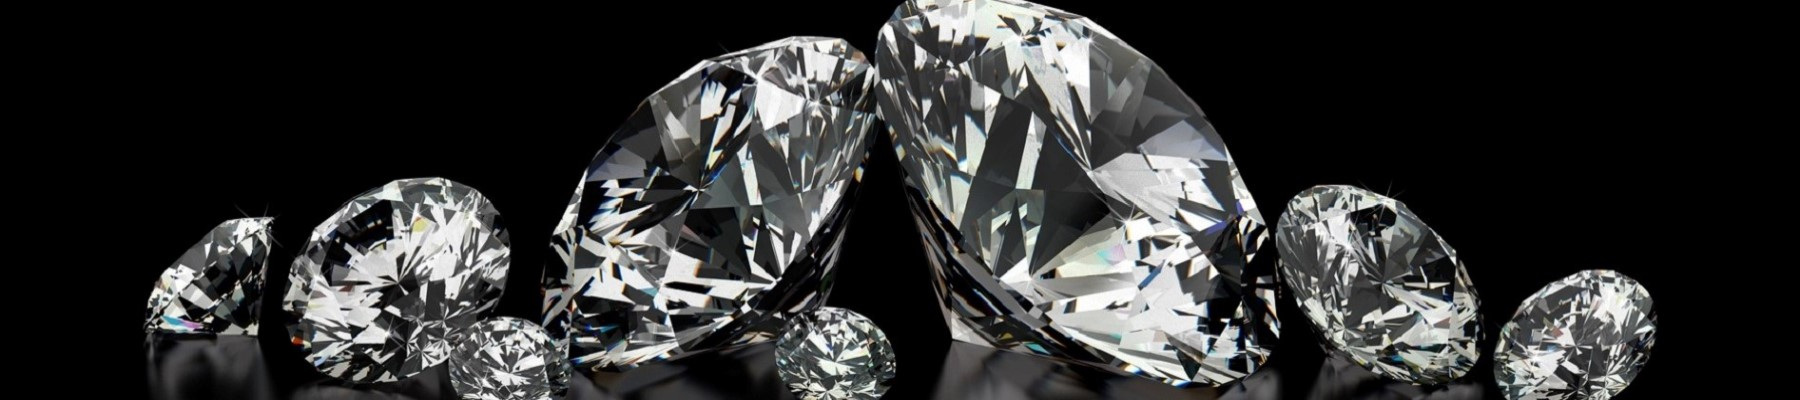

seaborn 라이브러리의 diamonds 데이터셋은 10개의 칼럼, 약 54000개의 행을 가지고 있습니다.


### 칼럼 설명
* **price**: The price of the diamond in US dollars ($326--$18,823).
<br>가격: 다이아몬드의 가격 (달러로 326--18,823).
<br>

* **carat**: The weight of the diamond (0.2--5.01).
<br>캐럿: 다이아몬드의 무게 (0.2--5.01).
<br>
* **cut**: The quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br>컷: 컷팅의 품질 (Fair, Good, Very Good, Premium, Ideal).
<br>
* **color**: Diamond color, from J (worst) to D (best).
<br>색상: 다이아몬드의 색상, J (최악)에서 D (최고)까지.
<br>
* **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br>선명도: 다이아몬드의 선명도 측정 (I1 (최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (최고)).
<br>
* **x**: Length in mm (0--10.74).
<br>x (길이): 밀리미터 단위의 길이 (0--10.74).
<br>
* **y**: Width in mm (0--58.9).
<br>y (너비): 밀리미터 단위의 너비 (0--58.9).
<br>
* **z**: Depth in mm (0--31.8).
<br>z (깊이): 밀리미터 단위의 깊이 (0--31.8).
<br>
* **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79).
<br>깊이 비율: 총 깊이 비율 = z / (x, y의 평균) = 2 * z / (x + y) (43--79).
<br>
* **table**: Width of top of diamond relative to widest point (43--95).
<br>테이블: 다이아몬드 상단의 폭이 가장 넓은 지점에 대한 상대적 폭 (43--95).
<br>


https://www.kaggle.com/datasets/shivam2503/diamonds
더 자세한 내용은 위 링크에서 확인할 수 있습니다.

## 데이터셋 다운로드

In [1]:
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 데이터 살펴보기
데이터의 **칼럼별 자료형**을 살펴보세요!

In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 가설 수립
데이터셋을 살펴보고, 다음의 자료형에 맞는 적절한 칼럼 조합을 하나씩 말해주세요.
<br>ex) carat - cut

* 수치형 - 수치형: price - carat
* 범주형 - 수치형: cut - depth
* 범주형 - 범주형: clarity - cut

## 가설 검정
4번에서 찾은 조합을 가지고, 데이터셋을 살펴보고 적절한 가설을 세운 후 검정 후 평가해봅시다.

### 수치형 - 수치형
* 귀무가설: 캐럿과 가격은 선형 상관관계가 없다.
* 대립가설: 캐럿과 가격은 선형 상관관계가 있다.

#### 시각화

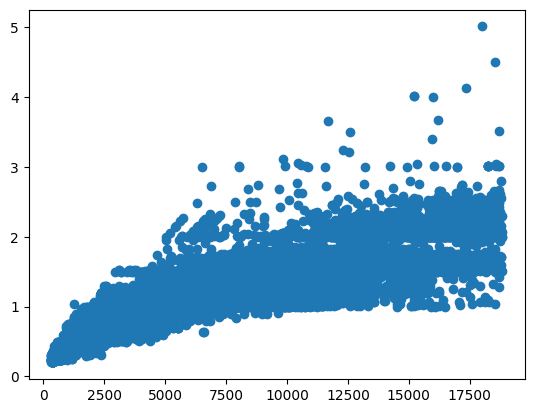

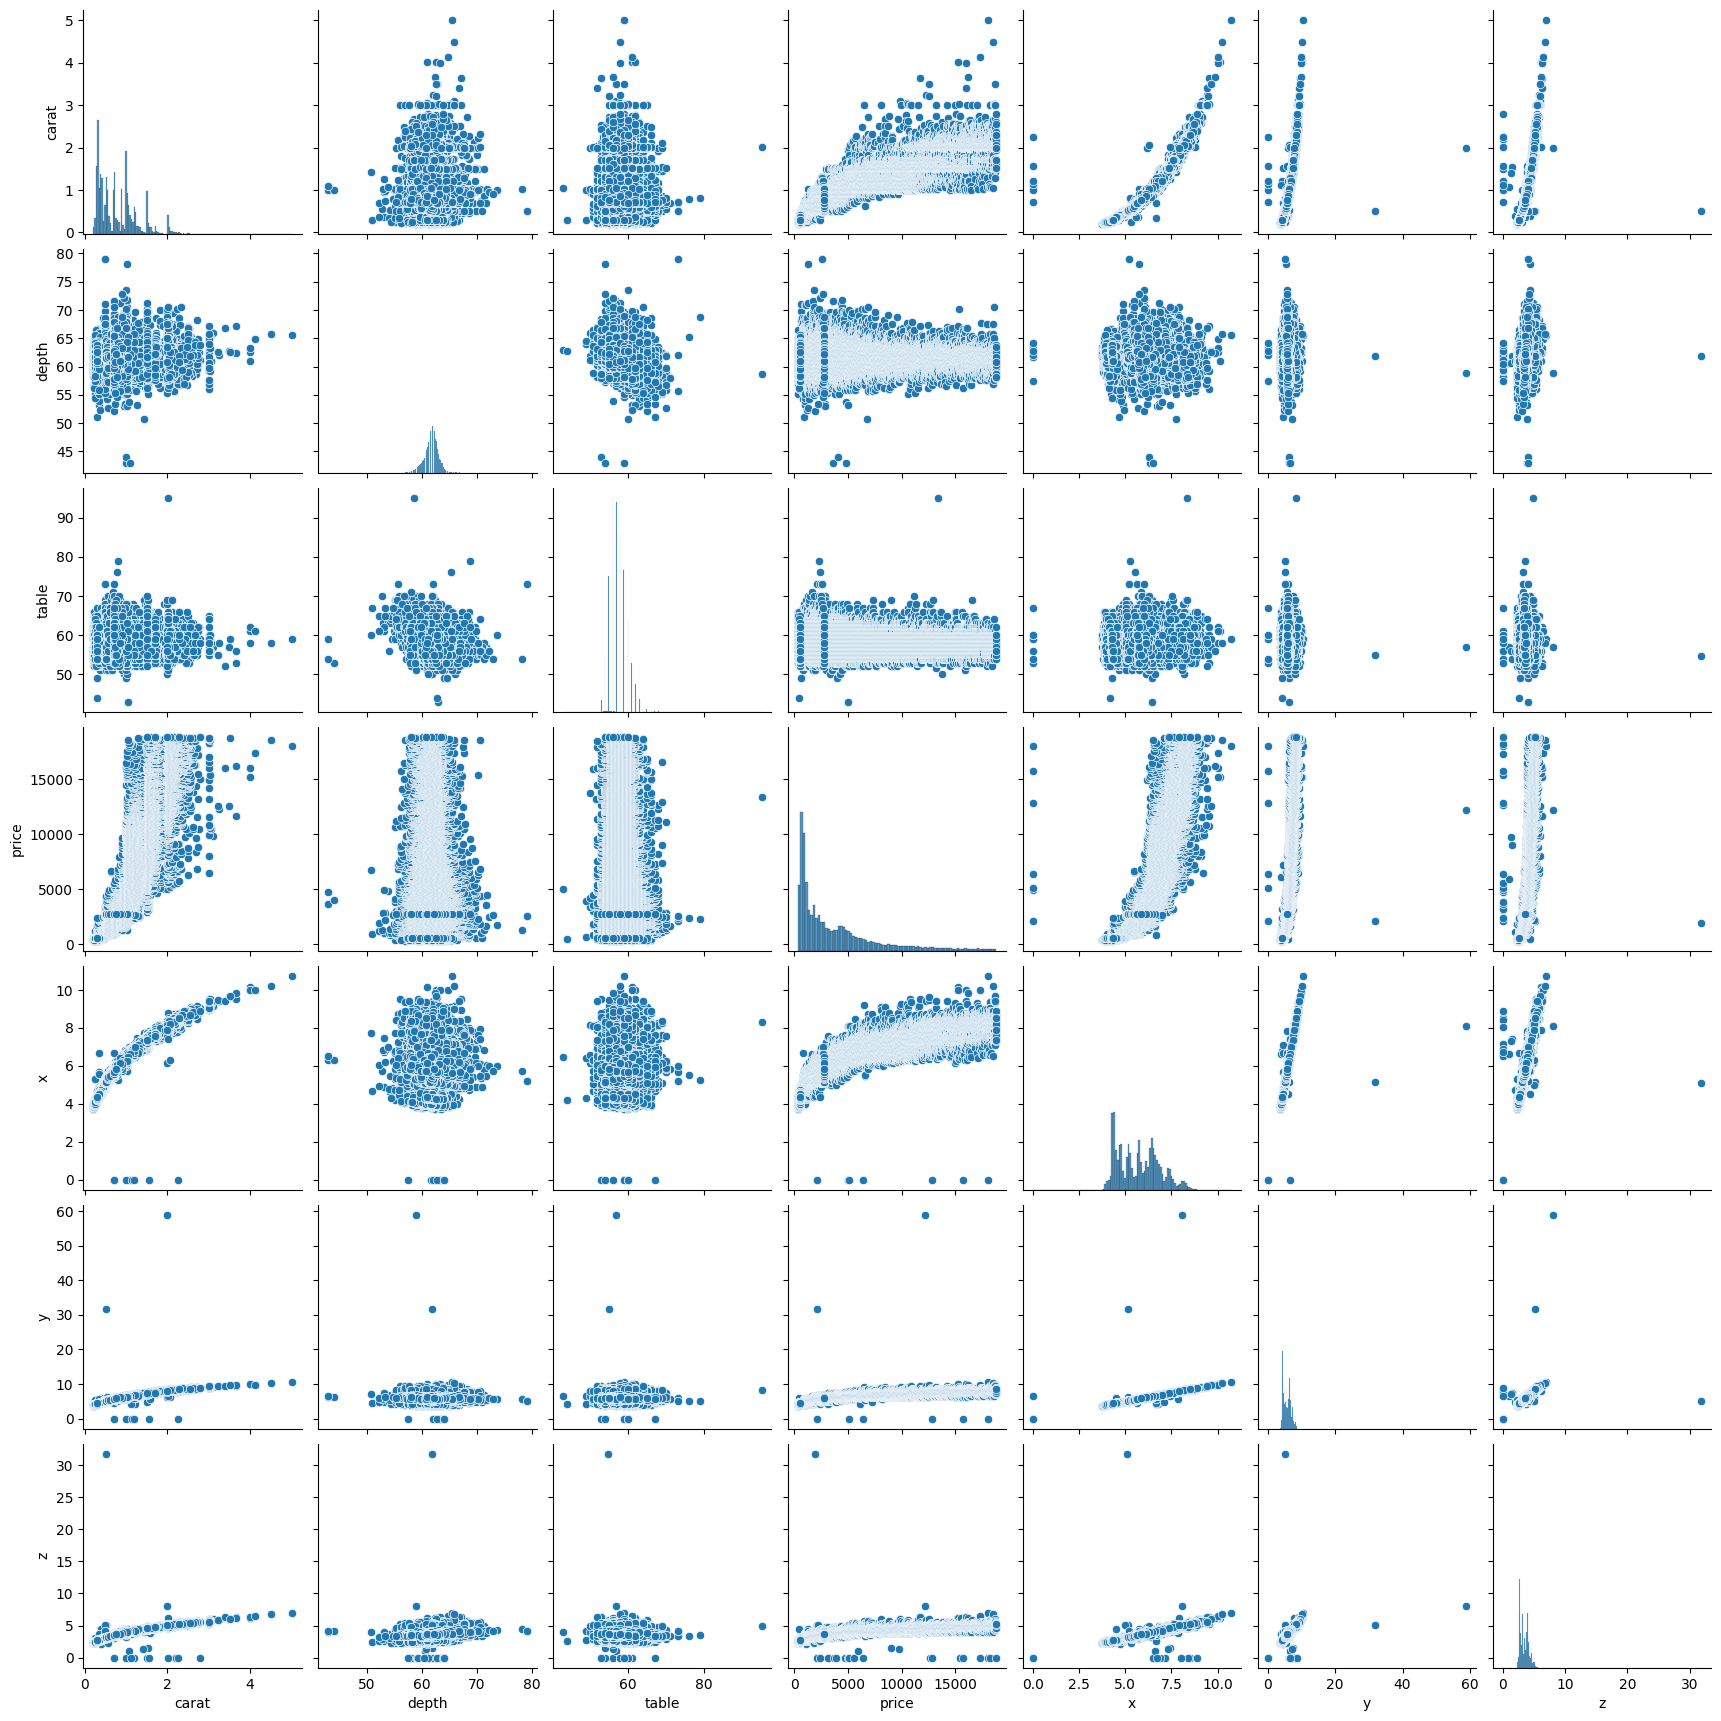

In [5]:
# 시각화 코드를 작성해주세요
import matplotlib.pyplot as plt
plt.scatter(diamonds['price'], diamonds['carat'])
sns.pairplot(diamonds)

#### 수치화

In [7]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import scipy.stats as spst
spst.pearsonr(diamonds['price'], diamonds['carat'])

PearsonRResult(statistic=np.float64(0.9215913011935006), pvalue=np.float64(0.0))

* p-값이 0.05 이하이므로, 귀무가설을 기각, 다이아몬드의 가격과 무게사이에는 통계적으로 유의미한 선형 상관관계가 있음.
* 상관계수의 절대값이 크므로 그 상관관계의 정도가 강함.

### 범주형 - 수치형
* 귀무가설: 다이아몬드 컷팅의 품질별 캐럿은 차이가 없다.
* 대립가설: 다이아몬드 컷팅의 품질별 캐럿은 차이가 있다.

#### 시각화

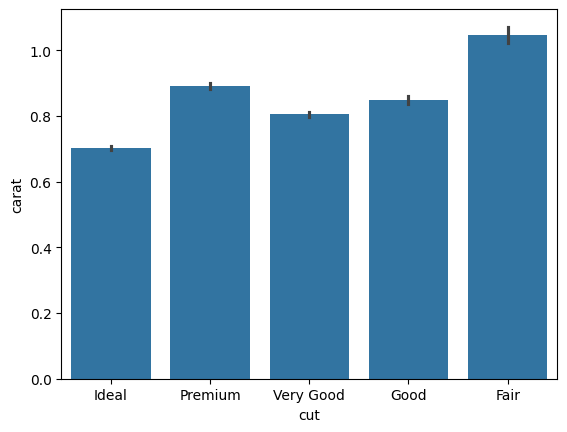

In [12]:
# 시각화 코드를 작성해주세요
sns.barplot(x = 'cut', y = 'carat', data = diamonds)
plt.show()

#### 수치화

In [13]:
# 여기에 검정을 수행하는 코드를 적어주세요.
carat_cut_1 = diamonds.loc[diamonds['cut']=='Ideal']['carat'].dropna()
carat_cut_2 = diamonds.loc[diamonds['cut']=='Premium']['carat'].dropna()
carat_cut_3 = diamonds.loc[diamonds['cut']=='Very Good']['carat'].dropna()
carat_cut_4 = diamonds.loc[diamonds['cut']=='Good']['carat'].dropna()
carat_cut_5 = diamonds.loc[diamonds['cut']=='Fair']['carat'].dropna()

# ANOVA 실시
f_value, p_value = spst.f_oneway(carat_cut_1, carat_cut_2, carat_cut_3, carat_cut_4, carat_cut_5)

# 결과 출력
print(f"F-Value: {f_value}, P-Value: {p_value}")

F-Value: 495.69425927416324, P-Value: 0.0


* p-값이 0.05 이하이므로, 다이아몬드의 컷팅의 품질에 따른 캐럿에 유의미한 차이가 있음을 의미.
* F값이 2~3 이상으로, 그 차이가 크다고 할 수 있음.

### 범주형 - 범주형
* 귀무가설: 다이아몬드의 선명도와 컷팅의 품질은 관련이 없다.(독립이다)
* 대립가설: 다이아몬드의 선명도와 컷팅의 품질은 관련이 있다.(종속이다)

#### 시각화

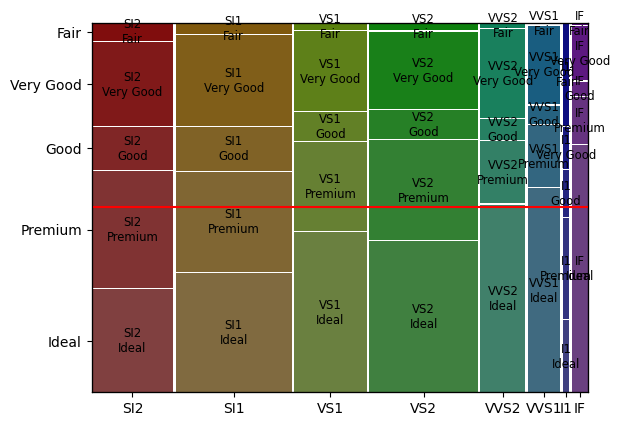

In [20]:
# 시각화 코드를 작성해주세요
!pip install statsmodels
from statsmodels.graphics.mosaicplot import mosaic

mosaic(diamonds, ['clarity','cut'])
plt.axhline(y=0.5, color = 'red')

#### 수치화

In [22]:
# 여기에 검정을 수행하는 코드를 적어주세요.
import pandas as pd
table = pd.crosstab(diamonds['clarity'],diamonds['cut'])
display(table)
spst.chi2_contingency(table)

cut,Ideal,Premium,Very Good,Good,Fair
clarity,,,,,
IF,1212,230,268,71,9
VVS1,2047,616,789,186,17
VVS2,2606,870,1235,286,69
VS1,3589,1989,1775,648,170
VS2,5071,3357,2591,978,261
SI1,4282,3575,3240,1560,408
SI2,2598,2949,2100,1081,466
I1,146,205,84,96,210


Chi2ContingencyResult(statistic=np.float64(4391.398067200363), pvalue=np.float64(0.0), dof=28, expected_freq=array([[ 715.17037449,  457.65461624,  400.94141639,  162.80571005,
          53.42788283],
       [1460.30598813,  934.48470523,  818.68205413,  332.43288839,
         109.09436411],
       [2024.05202076, 1295.23926585, 1134.73140527,  460.76744531,
         151.20986281],
       [3264.61292176, 2089.1038376 , 1830.21916945,  743.17623285,
         243.88783834],
       [4897.51868743, 3134.03926585, 2745.6647386 , 1114.90077864,
         365.87652948],
       [5219.94466073, 3340.36735261, 2926.4243604 , 1188.29977753,
         389.96384872],
       [3673.33878383, 2350.65728587, 2059.36054876,  836.22106044,
         274.4223211 ],
       [ 296.05656285,  189.45367075,  165.97630701,   67.39610679,
          22.11735261]]))

* p-값이 0.05 이하이므로, 두 변수 사이 관련이 있음을 의미.
* chi2값이 28\*2 보다 크므로, 그 관련 정도가 크다고 할 수 있음.

고생 많으셨어요:) 회귀 세션도 화이팅!